In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def fnr(detections, threshold):
    n = len(detections)
    count = 0
    # print("Threshold: ", threshold)
    for x in detections:
        if x < threshold:
            count += 1

    return ((count / n) * 100)

def fpr(detections, threshold):
    n = len(detections)
    count = 0
    for x in detections:
        if x > threshold:
            count += 1
    
    return ((count / n) * 100)

In [3]:
def preprocess(detections):
  n = len(detections)
  threshold = np.mean(detections) + 3 * np.std(detections)
  print(f"Size = {n}, Max = {np.max(detections)}, Min = {np.min(detections)}, Mean = {np.mean(detections): 10.8f}, STD = {np.std(detections): 10.8f}, D = {np.mean(detections) + 3 * np.std(detections): 10.8f}")
  

  index = np.zeros(n)
  results = np.zeros(n)

  for i, result in enumerate(detections):
    index[i] = i + 1
    results[i] = result
  
  index /= n
  results *= 10000

  return index, results, threshold

In [4]:
def plot_cdf_adversarial_audio(original_detections, adversarial_detections, attack_name):
  original_index, original_results, threshold = preprocess(original_detections)
  plt.plot(original_results, original_index, "k--", label="Spk10_test")

  i = 0
  colors = ["red", "blue", "green", "black", "yellow", "lime", "pink", "gold", "olive", "skyblue", "thistle"]
  for x in adversarial_detections:
    temp_index, temp_results, _ = preprocess(adversarial_detections[x])
    plt.plot(temp_results, temp_index, colors[i], label=f"{x}")
    i = (i + 1) % len(colors)
    print("------------------------------------------")
    print(f"FNR for {x}:", fnr(adversarial_detections[x], threshold))
    print("------------------------------------------")

  # adversarial_index, adversarial_results = preprocess(adversarial_detections)

  # plt.plot(adversarial_results, adversarial_index, "r-", label=f"{attack_name}")

  plt.xlabel(r'Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$', fontsize=12)
  plt.ylabel('CDF', fontsize=12)
  plt.title(attack_name)
  plt.tick_params(axis='both', labelsize=12)
  plt.legend()
  plt.tight_layout()
  plt.savefig(f"./plots/{x}.png")
  plt.show()

  if not os.path.exists("./plots"):
    os.makedirs("./plots")
  
  




In [5]:
# Original Audios
original_files = os.listdir(os.path.join("output", "original"))

original_data = {}
combined_data = []
for x in original_files:
  with open(f"output/original/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    original_data[x.split(".pickle")[0]] = temp
    combined_data.extend(temp)

combined_data.sort()


Size = 100, Max = 0.0002627831418067217, Min = 0.0, Mean =  0.00002505, STD =  0.00004500, D =  0.00016006
Size = 1000, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00010320, STD =  0.00025536, D =  0.00086927
Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 2100, Max = 0.0016693498473614454, Min = 0.0, Mean =  0.00005960, STD =  0.00018325, D =  0.00060935
FPR for Spk10_test: 2.8000000000000003


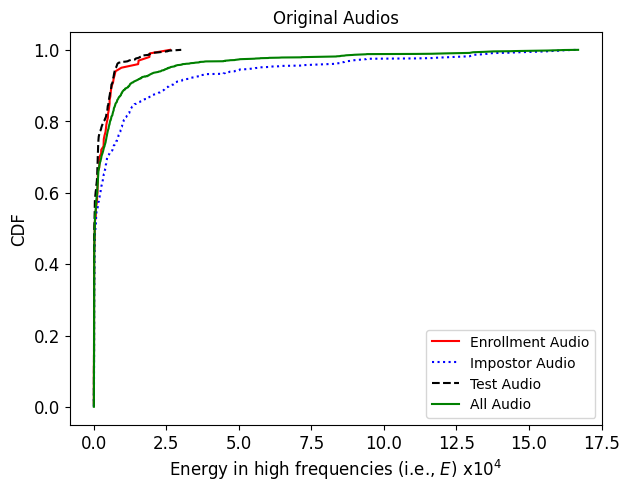

In [6]:
# Plot CDF of original data
enroll_index, enroll_results, enroll_threshold = preprocess(original_data['spk10enroll'])
impostor_index, impostor_results, impostor_threshold = preprocess(original_data['spk10impostor'])
test_index, test_results, test_threshold = preprocess(original_data['spk10test'])
all_index, all_results, all_threshold = preprocess(combined_data)

print("FPR for Spk10_test:", fpr(original_data["spk10test"], test_threshold))

plt.plot(enroll_results, enroll_index, "r-", label="Enrollment Audio")
plt.plot(impostor_results, impostor_index, "b:", label="Impostor Audio")
plt.plot(test_results, test_index, "k--", label="Test Audio")
plt.plot(all_results, all_index, "g", label="All Audio")

plt.xlabel(r"Energy in high frequencies (i.e., $E$) $\mathrm{x 10^{4}}$", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.tick_params(axis="both", labelsize=12)
plt.legend()
plt.tight_layout()
plt.title("Original Audios")
plt.savefig("plots/original_audios.png")
plt.show()

Size = 1000, Max = 0.00030118649010546505, Min = 0.0, Mean =  0.00001946, STD =  0.00003842, D =  0.00013473
Size = 465, Max = 0.009297085925936699, Min = 0.0016456766752526164, Mean =  0.00578406, STD =  0.00150653, D =  0.01030365
------------------------------------------
FNR for fakebob_0.002_0.0_50_1000_100: 0.0
------------------------------------------


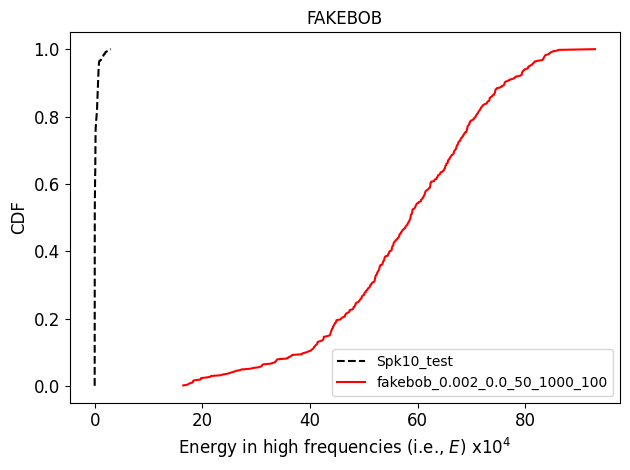

In [9]:
# FAKEBOB Attack
fakebob_files = os.listdir("output/fakebob_new/")
fakebob_data = {}
for x in fakebob_files:
  with open(f"output/fakebob_new/{x}", "br") as f:
    temp = pickle.load(f)
    temp.sort()
    fakebob_data[x.split(".pickle")[0]] = temp

plot_cdf_adversarial_audio(original_data["spk10test"], fakebob_data, "FAKEBOB")